#### 1.	 (10 points) An automobile magazine is interested in how well expensive cars can handle on the backroads of western Pennsylvania (PA). As such, they selected 60 of their employees to go to the backroads of western PA and test drive these cars. A total of 15 of these employees were randomly selected to drive a Bugatti Chiron, another 15 employees randomly selected to drive an Aston Martin DB11, and another 15 employees were randomly selected to drive a Lamborghini Centenario. To serve as a control, the remaining 15 employees were drove a 1992 Mercury Grand Marquis. Below is the recorded time (in minutes) each of the 60 employees took to drive their assigned car through a closed circuit of backroads in western Pennsylvania.



In [1]:
car_data<-read.csv('../car_data.csv', header = T)

In [2]:
head(car_data)

,Worker,Car,Time.to.Completion
1,1,Bugatti,5.23
2,2,Bugatti,5.75
3,3,Bugatti,5.52
4,4,Bugatti,5.12
5,5,Bugatti,5.51
6,6,Bugatti,5.4


#### a.	(1 point) Within the context of this problem, explain what an experimental unit is.

The experimental unit is each employee driving a car.

#### b.	(1 point) Test the normality of the distribution of the workers’ time to completion within each treatment. Why does ANOVA require this assumption?

ANOVA requires this assumption as the test statistics used to test differences ($F$, $t$, etc.) are distributional invalid if the underlying data is not normally distributed with respect to the error distribution. 


In [3]:
library(plyr)

ddply(car_data, .(Car), summarize, sw=shapiro.test(Time.to.Completion)$p.val)

,Car,sw
1,1992 Mercury,0.3414894
2,Aston Martin,0.2740136
3,Bugatti,0.9120645
4,Lamborghini,0.1443717


We can see in the preceding table that within each treatment (car type), the shapiro wilk test fails to reject the null hypothesis of normality at $\alpha=0.05$.

#### c.	(1 point) Test for constant variance. Use the results from part b.) to determine the best test to conduct. Discuss the conditions necessary to do the Fmax test.


Each treatment group is normally distributed, thus an asymptotically efficient test is the Harltley's Fmax test

In [5]:
library(SuppDists)

In [8]:
vs <- ddply(car_data, .(Car), summarize, v=var(Time.to.Completion))
n <- 15

F_max <- max(vs$v)/min(vs$v)

F_max_crit <- qmaxFratio(0.95, df=n-1, k=4)

mat <- matrix(c(F_max, F_max_crit), ncol=2, byrow=T)
colnames(mat)<-c("Fmax", "Critical Value")
mat

Fmax,Critical Value
4.151223,4.217194


We fail to reject the null of constant variance and therefore conclude that the variances are homogenous across the conditions.


d.	(1 point) Calculate the mean and variance for each location, and use R or SAS to produce boxplots of the data in each treatment group. Based on the relationship between the mean and the variance decide on the best transformation to make on the data, if any at all.


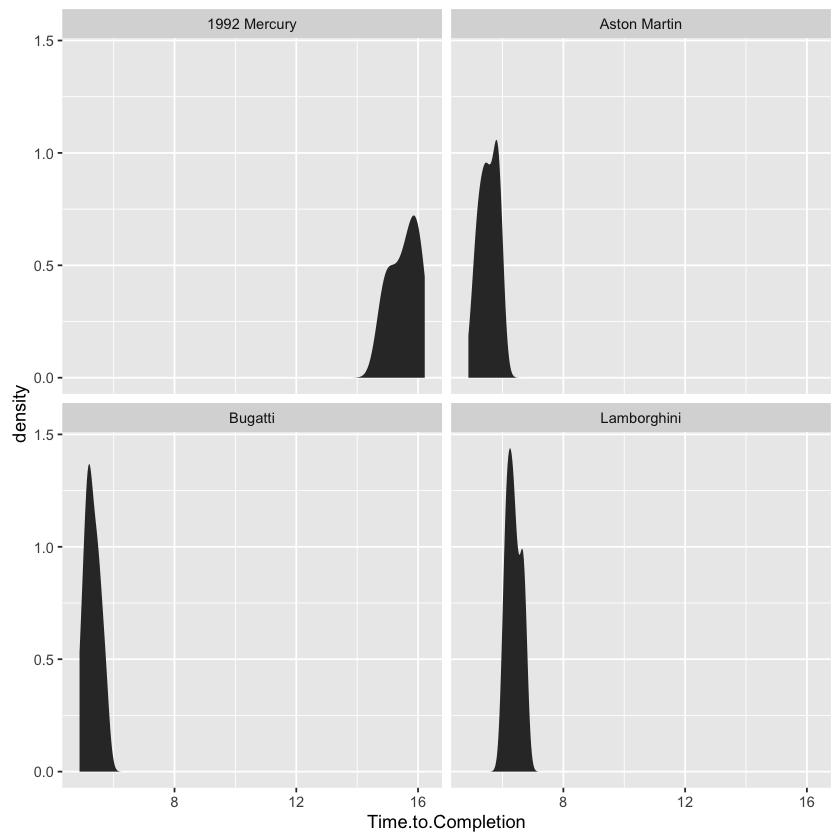

In [10]:
library(ggplot2)

ggplot(car_data, aes(x=Time.to.Completion))+stat_density()+facet_wrap(~Car)

In [11]:
mus <- ddply(car_data, .(Car), summarize, m = mean(Time.to.Completion))

In [12]:
mus

,Car,m
1,1992 Mercury,15.548
2,Aston Martin,5.542
3,Bugatti,5.298
4,Lamborghini,6.374667


In [13]:
vs

,Car,v
1,1992 Mercury,0.2281314
2,Aston Martin,0.09001714
3,Bugatti,0.06468857
4,Lamborghini,0.05495524


In [19]:

library(MASS)
library(broomR)

ERROR: Error in library(broomR): there is no package called ‘broomR’


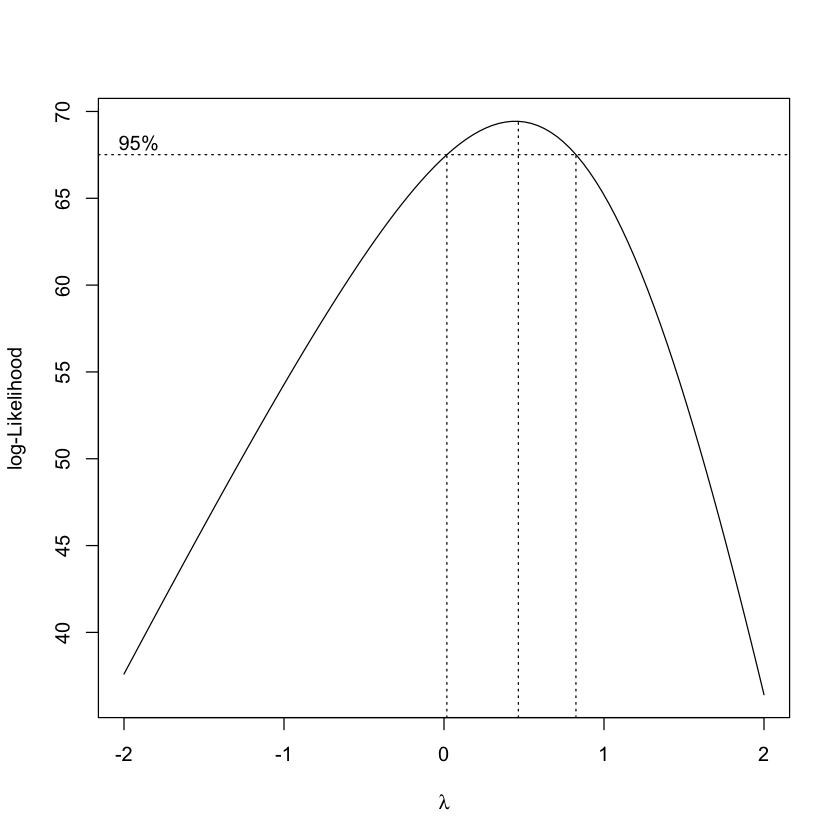

In [15]:
modl <- lm(Time.to.Completion ~ Car, data=car_data)

boxcox(modl)

#### The maximum likelihood approach that the box-cox function utilizes suggests a transformation of $\sqrt{y_i}$.

In [16]:
modl2<-lm(Time.to.Completion^(1/2) ~ Car, data=car_data)

#### e.	(2 points) Run an ANOVA model with the transformation you decided on in part d.). If you decided not to transform, use the original data. Make sure to look at the size of the means if a transformation was made. Finally, if a transformation was made, retest for constant variance. Use α = 0.05 for all hypothesis tests in this section. 


In [35]:
bartlett.test(Time.to.Completion^(1/2) ~ Car, data=car_data)$p.val

[1] 0.6703859

The p value from the bartlett test is more than $\alpha=0.05$ and thus we will fail to reject the null and conclude that the variances are homogeneous.

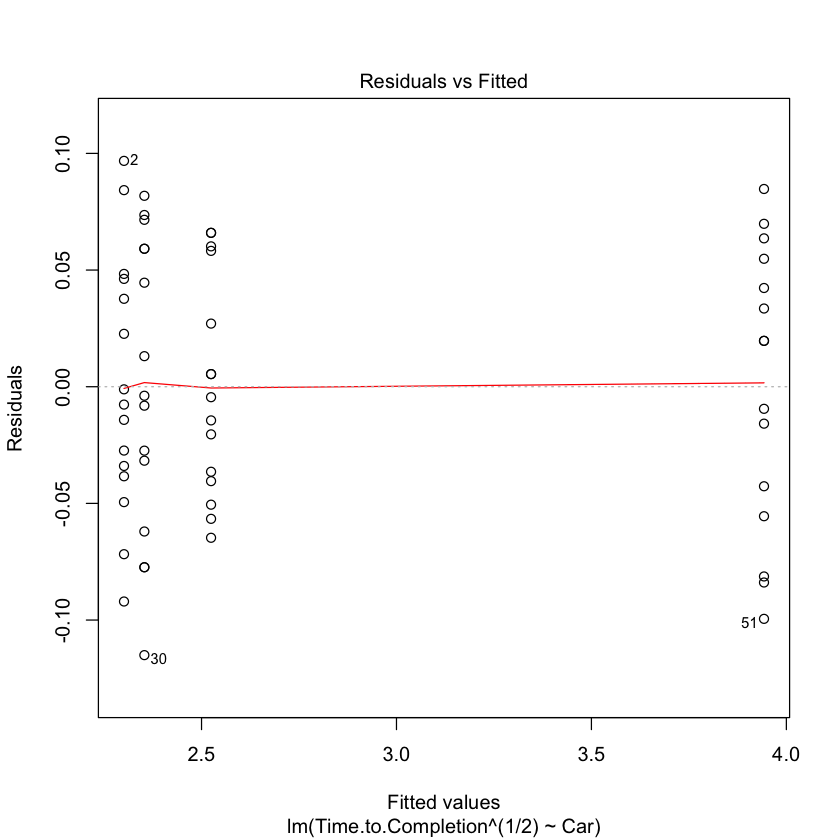

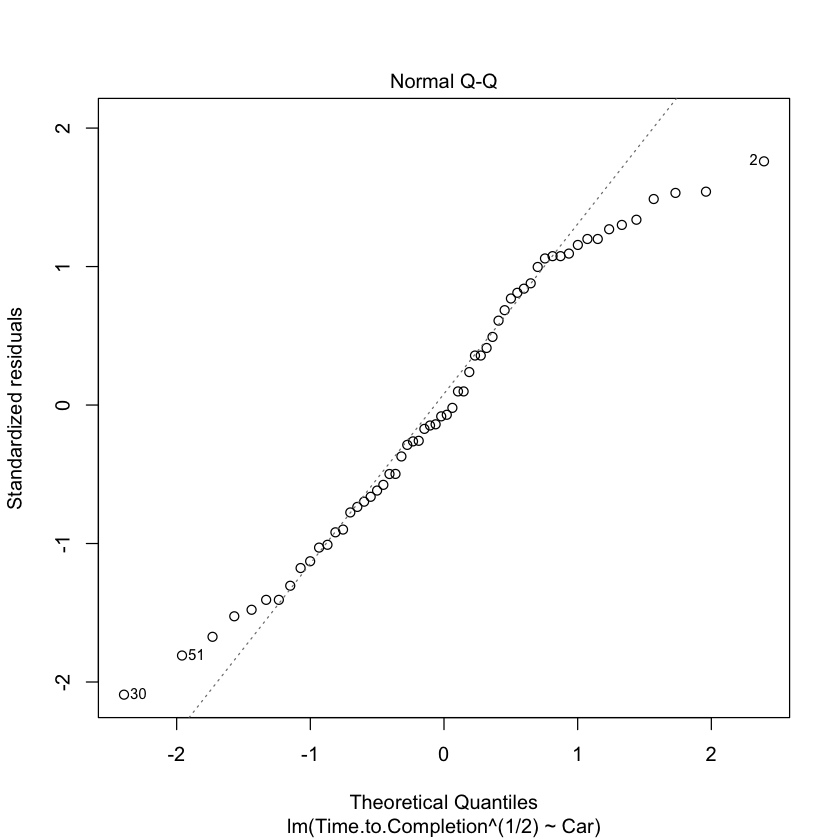

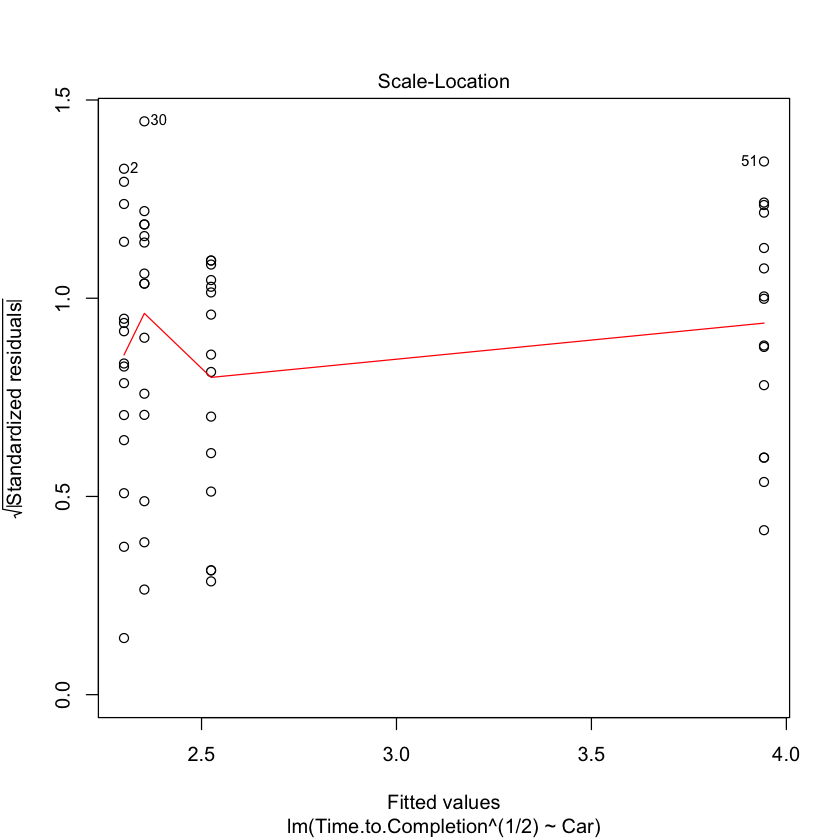

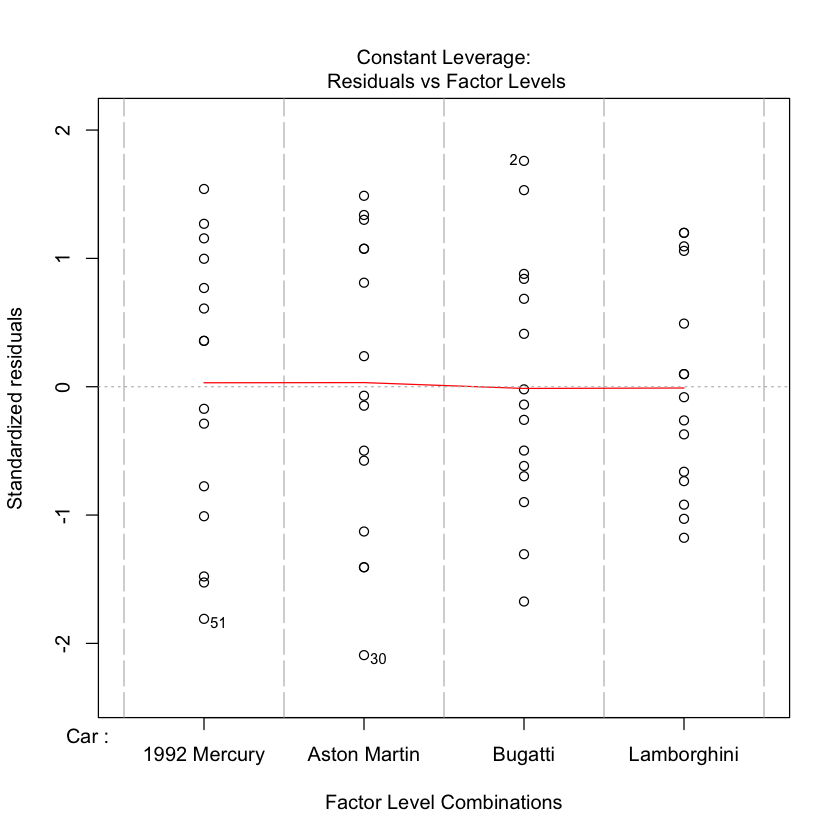

In [25]:

plot(modl2)

#### f.	(2 points) Output the residuals from the ANOVA model fitted in part e.) and test for the normality of the residuals at α = 0.01. Make a QQ-plot, boxplot, and histogram of the residuals. All of the code required to do this is provided in the Chapter 8 R code on Compass. Comment on how comfortable you are with these conclusions.


The QQ-plot is given above. The errors look relatively non-normal. I'm not very comfortable with concluding normality, and thus would probabily choose an semi parametric approach where the error variance is estimated with a plug-in estimator from the empirical CDF. 


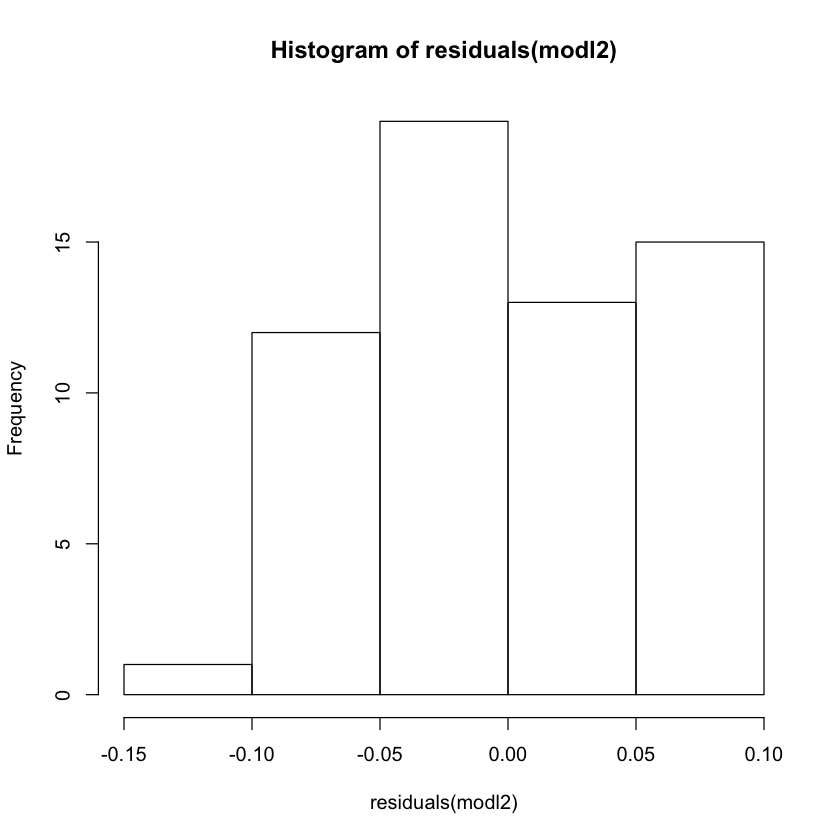

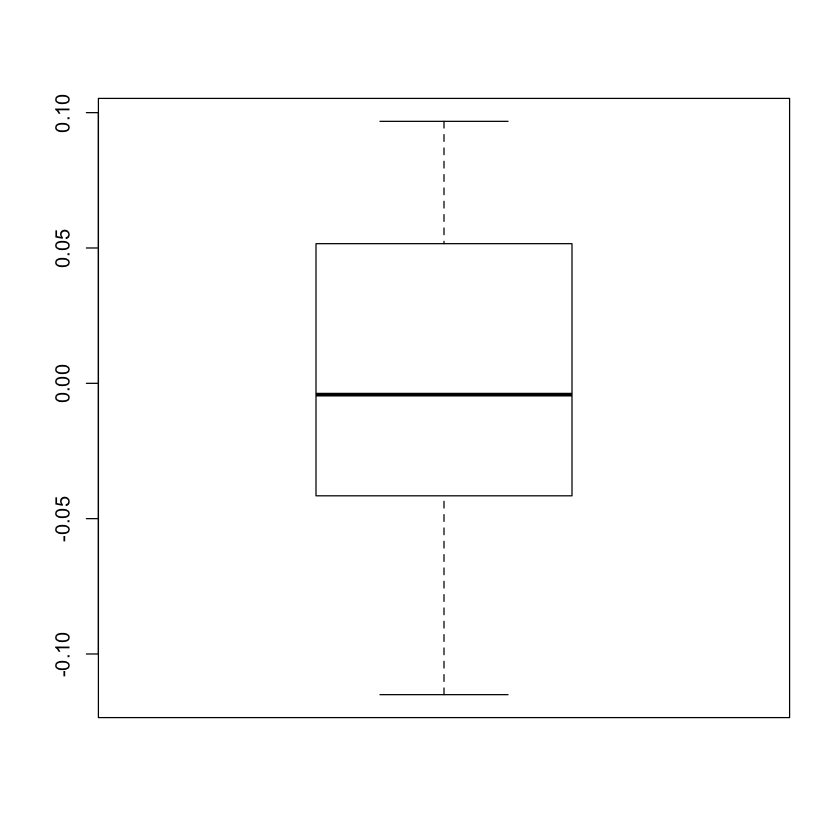

In [26]:
hist(residuals(modl2))
boxplot(residuals(modl2))


Both the boxplot and histogram indicate relative normality.

In [28]:
shapiro.test(residuals(modl2))


	Shapiro-Wilk normality test

data:  residuals(modl2)
W = 0.96495, p-value = 0.08231


We fail to reject the shapiro-wilk test at $\alpha=0.01$ and thus are in the clear.

#### g.	(2 points) Using software, run the Kruskal-Wallis nonparametric test on these data. Show the appropriate hypotheses and give a complete conclusion. Discuss whether or not it is necessary to use the Kruskal-Wallis test for these data. 
 
 
$$
H_0: \mu_1= ... \mu_4
$$

$$
H_a: \text{ At least one of the treatment means are different}
$$


In [30]:
kruskal.test(Time.to.Completion~Car, data =car_data)$p.val


[1] 4.758893e-11

The p-value for the kruskal-wallis test is much less than $\alpha=0.05$ and thus we reject $H_0$ and conclude that the cars have different completion times.